# Programación Estocástica

* Un programa es determinístico si cuando se corre con el mismo *input* produce el mismo *output*.
* Los programas determinísticos son muy importantes, pero existen problemas que no pueden resolverse de esta manera.
* La programación estocástica permite introducir aleatoriedad a nuestros programas para crear simulaciones que permiten resolver otro tipo de problemas.
* Las programas estocásticos se aprovechan de que las distribuciones probabilísticas de un problema se conocen o pueden ser estimadas.

## Cálculo de Probabilidades

* La probabilidad es una medida de la certidumbre asociada a un evento o suceso futuro y suele expresarse como un número entre 0 y 1.
* Una probabilidad de 0 significa que un suceso jamás sucederá.
* Una probabilidad de 1 significa que un suceso está garantizado de suceder en el futuro.

###

* Ley del complemento: $P(A) + P(~A) = 1$
* Ley multiplicativa: $P(A\ y\ B) = P(A) * P(B)$. Los eventos A y B deben ser independientes (mutuamente exclusivos).
* Ley aditiva:
    * $P(A\ o\ B) = P(A) + P(B)$. Los eventos A y B deben ser mutuamente exclusivos.
    * $P(A\ o\ B) = P(A) + P(B) - P(A\ y\ B)$. Esto aplica cuando los eventos son no exclusivos, si son eventos exclusivos entonces $P(A\ y\ B) = 0$.

### Simulación de probabilidades

The average is 3.492


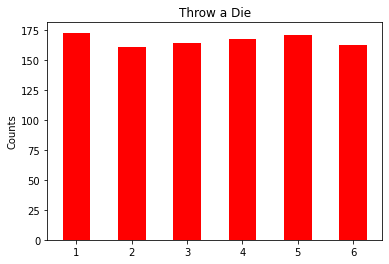

In [1]:
# Simulation of Tossing a Die to find Average result
# Uses a visual representation for the results

import matplotlib.pyplot as plt
import numpy as np
import random


def throw_die(data_list, times):
    total = 0
    for i in range(times):
        num = random.randint(1, 6)
        total = total + num
        data_list[num-1] = data_list[num-1] + 1
    average = total * 1.0 / times
    return average


# use a list to keep the times each number appears
test_data = [0, 0, 0, 0, 0, 0]
times = 1000  # throw a die n times
average = throw_die(test_data, times)
print('The average is', average)

# Plot the result
ind = np.arange(6)  # the x locations for the groups
width = 0.5      # the width of the bars
fig, ax = plt.subplots()
result = ax.bar(ind+width/2, test_data, width, color='r')
ax.set_ylabel('Counts')
ax.set_title('Throw a Die')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6'))
plt.show()


## Inferencia Estadística

* Con las simulaciones podemos calcular las probabilidades de eventos complejos sabiendo las probabilidades de eventos simples.
* ¿Qué pasa cuando no sabemos las probabilidades de los eventos simples?
* Las técnicas de Inferencia Estadística nos permiten inferir/concluir las propiedades de una población a partir de una muestra aleatoria.

> El principio guía de la Inferencia Estadístcia es que una muestra aleatoria tiende a exhibir las mismas propiedades que la población de la que fue extraída. - John Guttag

### Falacia del apostador

* La falacia del apostador señala que después de un evento extremo, ocurrirán eventos menos extremos para nivelar la media.
###
* La regresión a la media señala que después de un evento aleatorio extremo, el siguiente evento probablement será menos extremo.

### Media

* Es una medida de tendencia central.
* Comunmente es conocida como el promedio.
* La media de una población se denota con el símbolo $\mu$. La media de una muestra se denota con $\bar{X}$.

###

* ### ${\bar{x}} = {1\over{n}} \sum_{i=1}^n {x_i}$

###

* ### ${x_1 + x_2 + ... + x_n}\over{n}$



In [2]:
def media(X: list):
    return sum(X) / len(X)


In [3]:
import random

X = [random.randint(1, 21) for i in range(20)]

mu = media(X)

print(X)
print(mu)

[2, 15, 7, 14, 18, 5, 20, 7, 8, 16, 20, 18, 21, 12, 19, 17, 1, 3, 20, 6]
12.45


In [4]:
X = [random.randint(1, 21) for i in range(20)]

mu = media(X)

print(X)
print(mu)

[15, 12, 18, 7, 9, 13, 12, 21, 21, 3, 20, 16, 5, 10, 4, 11, 6, 9, 20, 3]
11.75


### Varianza y Desviacíón estándar

* La varianza mide qué tan propagados se encuentran un conjunto de valores aleatorios de su media.
* Mientras que la media nos da una idea de dónde se encuentran los valores, la varianza nos dice que tan dispersos se encuentran.
* La varianza siempre debe entenderse con respecto a la media.

### $Var(X) = {1\over{n}} \sum_{i=1}^n(x_i - \mu)^2$

* La desviación estándar es la raíz cuadrada de la varianza.
* Nos permite entender, también, la propagación y se debe entender siempre relacionado a la media.
* La ventaja sobre la varianza es que la desviación estándar está en las mismas unidades que la media.




In [5]:
def varianza(X: list):
    mu = media(X)

    suma = 0

    for x in X:
        suma += (x - mu) ** 2

    return suma / len(X)

In [6]:
def desviacion_estandar(X: list):
    return varianza(X) ** 0.5

In [7]:
X = [random.randint(1, 21) for i in range(20)]

mu = media(X)
Var = varianza(X)
std = desviacion_estandar(X)

print('Muestra:\n', X)
print('Media = ', mu)
print('Varianza = ', Var)
print('Desviación estándar =', std)

Muestra:
 [9, 10, 19, 6, 21, 14, 1, 7, 11, 14, 17, 4, 13, 8, 14, 1, 10, 6, 21, 6]
Media =  10.6
Varianza =  34.13999999999999
Desviación estándar = 5.842944463196616


### Distribución normal

* Es una de las distribuciones más recurrentes en cualquier ámbito.
* Se define completamente por su media y su desviación estándar.
* Permite calcular intervalos de confianza con la regla empírica.

### $f(x) = {1\over{\sigma\sqrt{2\pi}}}e^{-{1\over2}({{x - \mu}\over{\sigma}})^2}$

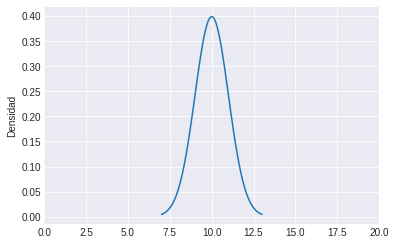

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.style.use('seaborn-darkgrid')

mu = 10
sigma = 1

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.ylabel('Densidad')
plt.xlim([0, 20])
plt.show()

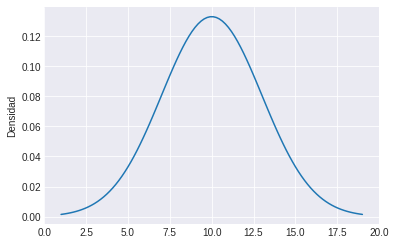

In [9]:

mu = 10
sigma = 3

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.ylabel('Densidad')
plt.xlim([0, 20])
plt.show()

#### Regla empírica

* También conocida como la regla 68-95-99.7
* Señala cuál es la dispersión de los datos un una distribución normal a uno, dos y tres sigmas.
* Permite calcular probabilidades con la densidad de la distribución normal.

- $Pr(\mu - 1\sigma \le X \le \mu + 1\sigma) \approx 0.6827$
- $Pr(\mu - 2\sigma \le X \le \mu + 2\sigma) \approx 0.9545$
- $Pr(\mu - 3\sigma \le X \le \mu + 3\sigma) \approx 0.9973$